# Methane satellite observations completeness assessment for greenhouse gas monitoring

Production date: 30-09-2025

Produced by: CNR

## 🌍 Use case: Using satellite column-averaged XCH$_4$ observations for investigating global and zonal methane growth rates

## ❓ Quality assessment question
* **Is the spatial coverage of XCH$_4$ EMMA Level 2 merged dataset suitable to calculate the methane annual global and zonal growth rates?**

Methane (CH$_4$) is the second most important anthropogenic greenhouse gas after carbon dioxide (CO$_2$), representing about 19% of the total radiative forcing by long-lived greenhouse gases [[1]](https://library.wmo.int/idurl/4/68532). Atmospheric CH$_4$ also adversely affects human health as a precursor of tropospheric ozone [[2]](https://doi.org/10.1073/pnas.0600201103). Monitoring the long-term CH$_4$ variability is therefore crucial for tracking the emission reductions [[3]](https://doi.org/10.5194/essd-17-1873-2025). Calculating growth rates is particularly important, as they provide a direct measure of how atmospheric CH$_4$ responds to changing emissions and sinks, and help disentangle interannual variability from long-term trends ([[4]](https://doi.org/10.5194/acp-24-577-2024), [[5]](https://doi.org/10.1038/s41558-023-01629-0)).

In this assessment, atmospheric CH$_4$ global and zonal growth rates are derived from the XCH$_4$ merged Ensemble Median Algorithm (EMMA) Level 2 dataset (version 4.5 [[6]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf)), by adopting an approach similar to [[4]](https://doi.org/10.5194/acp-24-577-2024).

The EMMA Level 2 data products comprise individual soundings retrieved by algorithms that can change from grid box to grid box and from month to month. For more details see [[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_D_latest.pdf). By analyzing an ensemble of different Level 2 datasets from various retrieval algorithms, the EMMA algorithm generates a dataset containing XCH$_4$ from individual retrievals. In particular, for each month and 10°$\times$10° grid box, the algorithm with the grid box mean closest to the median is selected. The list of the considered retrieval algorithms is available from [[6]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf). The various retrieval algorithms are optimized for different instruments (SCIAMACHY, GOSAT, GOSAT-2), which measure backscattered solar radiation in the near-infrared for O$_2$ as well as the absorption bands of CO$_2$ or CH$_4$.

The code is included for transparency and learning purposes, giving users the chance to adapt it for their own analyses. Users should always refer to the official reports for scientific assessments related to atmospheric CH$_4$ variability (e.g., [[8]](https://doi.org/10.24381/14j9-s541), [[9]](https://climate.copernicus.eu/global-climate-highlights-2024)). 

## 📢 Quality assessment statements

```{admonition} These are the key outcomes of this assessment
:class: note
* The dataset "Methane data from 2002 to present derived from satellite observations" can be used to evaluate XCH$_4$ global and zonal growth rates.
* For the high-latitude zonal bands ([70 °N-90 °N] and  [90 °S-70 °S]), the few available data prevent a solid quantification of annual growth rates. In addition, for the latitude bands [70 °S-50 °S] and [50 °N-70 °N], the monthly growth rates before March 2009 should be treated with extreme caution, as they are affected by non-uniform data coverage and high uncertainties in the data.
* Before 2009, the global annual growth rates are characterised by higher standard deviations and thus must be considered with caution.
* The different averaging methods do not particularly affect the growth rate distributions and growth rate anomalies, both globally and zonally.
* The reduction in the global XCH$_4$ increases in 2022 with respect to 2021 can be attributed to decreased growth rates in the Northern Hemisphere, as growth rates in the Southern Hemisphere remained high.
```

## 📋 Methodology

In this notebook, we investigate whether the merged EMMA Level 2 product is suitable for calculating XCH$_4$ growth rates, over 2004-2022. The input data are the XCH$_4$ merged EMMA Level 2 files (version 4.5, see [[6]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf)). For the calculations, and following the approach presented in [[4]](https://doi.org/10.5194/acp-24-577-2024), the merged EMMA Level 2 data were first regridded onto a daily regular 2°$\times$2° grid, using spatially weighted mean. A possible extension of this notebook could be the application of the inhomogeneity treatment to the input data (see [[4]](https://doi.org/10.5194/acp-24-577-2024)), which is not implemented here.

In this analysis, to estimate XCH$_4$ global increases and zonal growth rates (in 20° latitude bands), we calculated the monthly growth rates as the centered rolling difference between the XCH$_4$ value of month $i$ and the XCH$_4$ value of month $i$-12. As done in [[4]](https://doi.org/10.5194/acp-24-577-2024), we also compare two different methods for calculating monthly averages, i.e.: 
* the "standard averaging", defined as the area-weighted mean of all grid cells in the region of interest;
* the "zonal-first averaging", which is computed by first evaluating the $m$ averages for all 2° latitude bands, and then averaging these $m$ zonal averages. $m$ can be equal to 90 for global data, or, e.g., 10 for a 20° zonal band.

The zonal-first average should ensure a consistent weighting of all the latitudes, regardless of their individual coverage ([[4]](https://doi.org/10.5194/acp-24-577-2024)). 

For better investigating the differences between the hemispheres concerning growth rates, we also computed growth rate anomalies, defined as the difference between the zonal and the global growth rates.

The analysis and results are organized in the following steps, which are detailed in the sections below:

**[](template:section-1)**
 * Import all the relevant packages.
 * Choose the temporal coverage for the analysis.
 * Cache needed functions.

**[](template:section-2)**
 * In this section, we define the data request to CDS.

**[](template:section-3)**

This section presents several results for the XCH$_4$ growth rates, i.e.:
 * the calculation of global XCH$_4$ increases
 * the calculation of the zonal XCH$_4$ growth rates (into 20° latitude bands), to provide spatial information on the global CH$_4$ increases
 * the computation of the zonal growth rate anomalies, defined as the differences between zonal and global growth rates

## 📈 Analysis and results

(template:section-1)=
### 1. Choose the data to use and set-up the code

#### Import all relevant packages
In this section, we import all the relevant packages needed for running the notebook and we define the style for plot appearance ("seaborn-v0_8-notebook").

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import xarray as xr
from c3s_eqc_automatic_quality_control import download
from xarray.groupers import BinGrouper

plt.style.use("seaborn-v0_8-notebook")

#### Choose the temporal coverage
In this section, we define the temporal period of the analysis, that can be customized by the user. For this notebook, we selected the 2004-2022 period.

In [2]:
year_start = 2004
year_stop = 2022

#### Cache needed functions
In this section, we cached a list of functions used in the analyses.

- The functions `spatial_weighted_mean` and `spatial_weighted_std`compute the spatial XCH$_4$ mean and standard deviation, respectively, over the selected domain. Through the function named `weight_dataset`, they use spatial weighting to account for the latitudinal dependence of the grid size in the lon/lat grids. This is a common approach, e.g., in the treatment of reanalysis and forecast model data.

- The function `regrid` regrids the XCH$_4$ Level 2 data onto a regular $m \times n$ grid, where $m$ and $n$ can be customized by the user. It uses `spatial_weighted_mean` for grouping data onto the regular grid.

- The function `daily_regrid` uses the aforementioned `regrid` function for regridding the XCH$_4$ data onto a regular $m$°$\times$$n$° grid, with a daily time resolution. Again, $m$ and $n$ can be customized by the user.

- The function `monthly_regrid_in_bands` resamples the input dataset into $n$° latitude bands, by using the `regrid` function and a monthly time resolution. $n$ is a parameter that can be specified by the user within the function. If the option `zonal_first` is selected, then the zonal-first averaging is calculated, following the methodology presented in [[4]](https://doi.org/10.5194/acp-24-577-2024) and described above.

- The function `compute_growth_rate` calculates the monthly resolved annual growth rates of XCH$_4$, computed as the centered rolling difference of the XCH$_4$ value of month $i$ minus the XCH$_4$ value of month $i$-12.

- The function `band_from_central_latitude` is used for explicitly specifying the latitude extremes rather than the central latitude for each band.

In [3]:
def weight_dataset(obj):
    weights = np.abs(np.cos(np.deg2rad(obj["latitude"])))
    return obj.weighted(weights)


def spatial_weighted_mean(obj, dim=None):
    return weight_dataset(obj).mean(dim, keep_attrs=True)


def spatial_weighted_std(obj, dim=None):
    return weight_dataset(obj).std(dim, keep_attrs=True)


def regrid(ds, d_lon, d_lat, lon1=180):
    if lon1 not in (180, 360):
        raise ValueError(f"lon1 must be 180 or 360. {lon1=}")
    lon0 = -180 if lon1 == 180 else 0

    coords = {}
    for name, start, stop, step in zip(
        ["latitude", "longitude"],
        [-90, lon0],
        [90, lon1],
        [d_lat, d_lon],
    ):
        if step is None:
            continue
        coords[name] = BinGrouper(
            np.arange(start, stop + step, step),
            include_lowest=True,
            labels=np.arange(start + step / 2, stop + step / 2, step),
        )
    ds = ds.compute()  # Groupby map does not work with dask
    ds = ds.groupby(**coords).map(spatial_weighted_mean)
    ds = ds.drop_vars(set(coords) & set(ds.variables)).rename(
        {f"{coord}_bins": coord for coord in coords}
    )
    return ds


def daily_regrid(ds):
    ds = ds[["xch4", "latitude", "longitude"]]
    datasets = []
    for time, ds_time in tqdm.tqdm(ds.resample(time="1D")):
        ds_time = regrid(ds_time, d_lon=2, d_lat=2)
        datasets.append(ds_time.expand_dims(time=[time]))
    return xr.concat(datasets, "time")


def monthly_regrid_in_bands(ds, zonal_first):
    datasets = []
    for time, ds_time in ds.resample(time="1MS"):
        if zonal_first:
            ds_time = ds_time.mean("longitude", keep_attrs=True)
        ds_time = regrid(ds_time, d_lat=20, d_lon=None)
        datasets.append(ds_time.expand_dims(time=[time]))
    return xr.concat(datasets, "time")


def compute_growth_rate(ds, zonal_first):
    da = monthly_regrid_in_bands(ds, zonal_first)["xch4"]
    da = (
        da.rolling(time=12, center=True)
        .construct("window_dim")
        .isel(window_dim=[0, -1])
        .diff("window_dim")
        .squeeze()
    )
    da.attrs = {"units": "ppm/year", "long_name": "Growth Rate"}
    return da

def band_from_central_latitude(latitude):
    latitudes = [latitude - 10, latitude + 10]
    return " – ".join(
        [f"{abs(int(lat))}°{'S' if lat < 0 else 'N'}" for lat in latitudes]
    )

(template:section-2)=
### 2. Retrieve XCH$_4$ data (EMMA, Level 2)
In this section, we define the data request to CDS (merged EMMA data product, Level 2, version 4.5, XCH$_4$) and download the dataset.

In [4]:
collection_id = "satellite-methane"
request = {
    "processing_level": "level_2",
    "variable": "xch4",
    "sensor_and_algorithm": "merged_emma",
    "version": "4_5",
    "year": [str(year) for year in range(year_start, year_stop + 1)],
    "month": [f"{i:02d}" for i in range(1, 13)],
    "day": [f"{i:02d}" for i in range(1, 32)],
}

In [5]:
ds = download.download_and_transform(
    collection_id,
    request,
    chunks={"year": 1},
    transform_func=daily_regrid,
)

100%|██████████| 19/19 [00:01<00:00, 12.34it/s]


(template:section-3)=
### 3. Data analysis

#### Global annual XCH$_4$ increases
In this section, we present the global annual growth rates of XCH$_4$, defined as the average of all monthly growth rates within each calendar year. For the calculation of growth rates, two different averaging methods were applied to the regridded (onto a daily regular 2°$\times$2° grid) Level 2 data, following the methodology presented in [[4]](https://doi.org/10.5194/acp-24-577-2024). The "standard averaging" is defined as the spatially weighted average of all grid cells in a given region. This was compared to the so-called "zonal-first averaging", which is computed as follows: (i) first, the 90 averages for all 2° latitude bands are computed; then (ii) the average of these 90 zonal averages is calculated, yielding each monthly value of the global time series. As shown in [[4]](https://doi.org/10.5194/acp-24-577-2024), the zonal-first averaging has the advantage of taking into account the inhomogeneous sampling at each latitude, which is influenced by both the distribution of land mass and the seasonal coverage of measurements.

In agreement with recent studies (e.g., [[10]](https://doi.org/10.5194/acp-23-4863-2023)), the behavior of the global XCH$_4$ growth rate has shown a near-zero growth until 2007, followed by a clear acceleration in subsequent years due to increased emissions from wetlands in the tropics and from anthropogenic sources at the mid-latitudes of the Northern Hemisphere ([[1]](https://library.wmo.int/idurl/4/68532)), with maxima observed in the last three years of the time series. The highest global annual XCH$_4$ increases were recorded in 2021, followed by 2022 and 2020. According to [[10]](https://doi.org/10.5194/acp-23-4863-2023), most of the observed increase in atmospheric XCH$_4$ during 2020 and 2021 was due to increased emissions, with a significant contribution from reduced levels of OH. A recent study ([[11]](https://doi.org/10.5194/acp-25-6757-2025)) suggests a prominent role of biogenic emissions in Asian regions for the persistent high growth rate observed during 2020–2022. The results obtained using the two different averaging methods are comparable for all years, indicating that the choice of the averaging method does not significantly affect the estimated growth rates. 

In the plot, also uncertainties are reported, and these are computed as the annual standard deviation of all monthly growth rates within each calendar year. The most evident feature is the overall decrease in the uncertainties after 2009, likely due to the introduction of algorithms based on GOSAT observations used to calculate the median XCH$_4$ data [[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_D_latest.pdf).

In [6]:
dataarrays = []
for zonal_first in [False, True]:
    da = compute_growth_rate(ds, zonal_first=zonal_first)
    dataarrays.append(
        da.expand_dims(method=["Zonal-first" if zonal_first else "Standard"])
    )
da = xr.concat(dataarrays, "method").sel(time=slice(str(year_start), str(year_stop)))

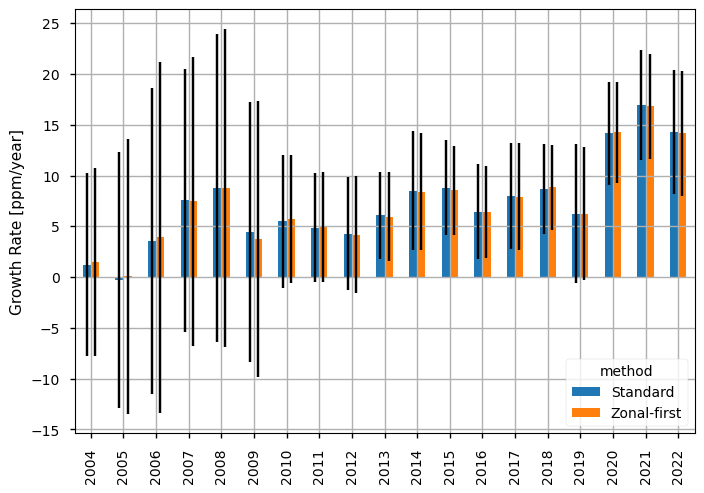

In [7]:
grouped = da.groupby("time.year")
da_mean = grouped.map(spatial_weighted_mean, dim=["time", "latitude"])
da_std = grouped.map(spatial_weighted_std, dim=["time", "latitude"])
df_mean = da_mean.to_pandas().T
df_std = da_std.to_pandas().T
ax = df_mean.plot.bar(yerr=df_std)
ax.grid()
_ = ax.set_ylabel(f"{da_mean.long_name} [{da_mean.units}]")
_ = ax.set_xlabel("")   # removes x-axis label
_ = ax.legend(loc="lower right", title="method")

*Global annual XCH$_4$ increases over 2004-2022. The colors differentiate between the standard averaging (orange) and the zonal-first averaging (blue) methods. Bars indicate the uncertainties in the annual increases, computed as $\pm$1 standard deviation.*

#### Zonal growth rates of XCH$_4$
In this section, we calculate and report the monthly growth rates of XCH$_4$, divided into 20° latitude bands, to provide spatial context for the global growth rates presented above. 

The figure shows the zonal growth rates for the nine 20° latitude bands, using the two different averaging methods described previously. Please note that the limits on the y-axis can be customized by the user. 

For most latitude bands, the behavior is similar to that observed for the global growth rates. The [70 °N-90 °N] band, however, is characterized by almost no clear tendency throughout the years, and this is because the high-latitude regions are characterized by sparse sampling and higher uncertainties in the data. Data below 60 °S are only available until 2005, and this is the cause for almost completely missing data in the [70 °S-90 °S] latitude band ([[6]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf)). For the latitude bands [70 °S-50 °S] and [50 °N-70 °N], the monthly growth rates are characterised by a higher temporal variability before March 2009, as data over land is only available from the SCIAMACHY WFMD product in this period ([[6]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf)).

The two different averaging methods show better agreement after 2010, with nearly identical results across all zonal bands. Before 2010, the growth rates exhibit higher variability, with larger differences between standard and zonal-first averaging. This is likely due to the introduction, after 2009, of algorithms incorporating GOSAT observations to calculate median XCH$_4$ values [[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_D_latest.pdf). 

Interestingly, as also reported in [[4]](https://doi.org/10.5194/acp-24-577-2024), the reduction in global XCH$_4$ growth in 2022 with respect to 2021 can be attributed to decreased growth rates in the Northern Hemisphere (particularly evident in the [10 °N-30 °N] and [30 °N-50 °N] latitude bands), while growth rates in the Southern Hemisphere remain high.

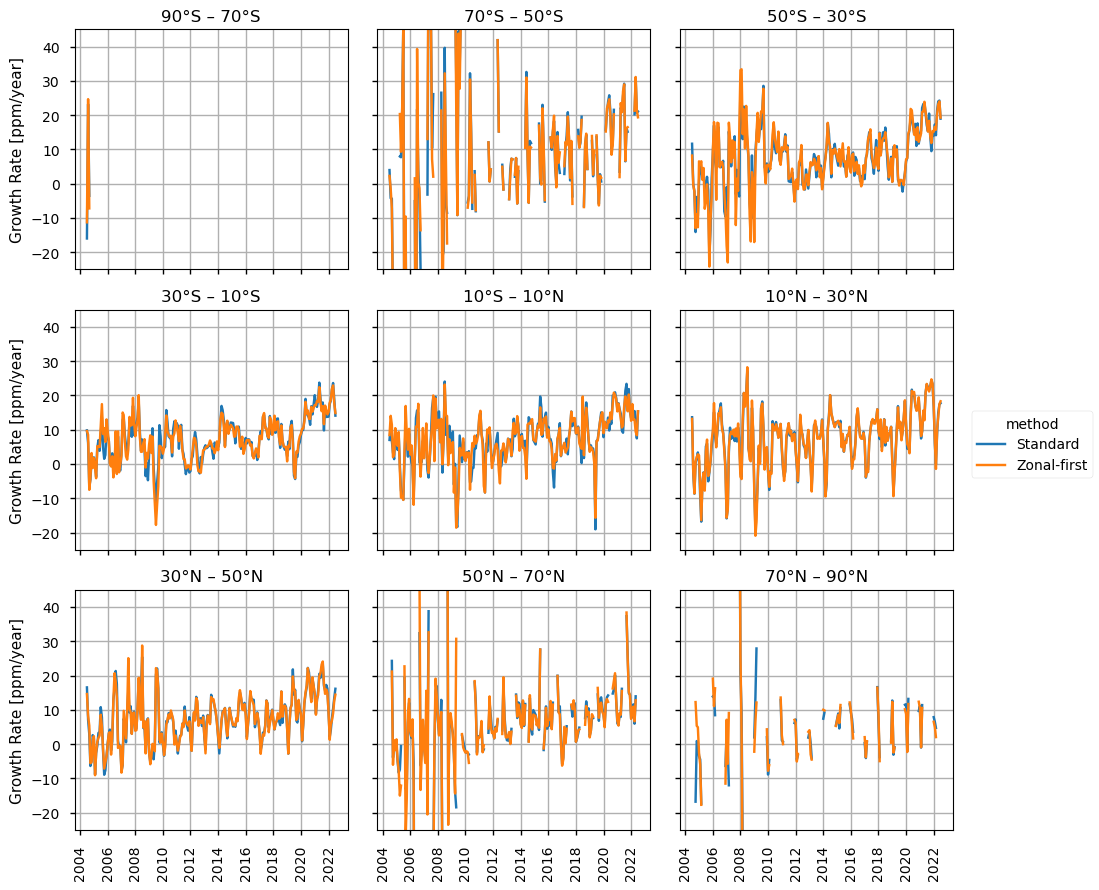

In [22]:
facet = da.plot(col="latitude", col_wrap=3, hue="method")
for ax, sel_dict in zip(facet.axs.flatten(), facet.name_dicts.flatten()):
    ax.grid()
    ax.set_ylim([-25, 45])  # set your desired limits
    ax.set_xlabel("")       # removes the x-axis label
    ax.set_title(band_from_central_latitude(sel_dict["latitude"]))
    for label in ax.get_xticklabels():
        label.set_rotation(90)

*Zonal growth rates of XCH$_4$, over 2004-2022. The panels indicate the 20° latitude bands selected for the analysis. The colors differentiate between the standard averaging (orange) and the zonal-first averaging (blue) methods.*

#### Zonal growth rate anomalies of XCH$_4$
In this section, we calculate and report the zonal growth rate anomalies, defined as the difference between the zonal and global growth rates for each of the 20° latitude bands presented above. As also indicated in [[4]](https://doi.org/10.5194/acp-24-577-2024), the zonal growth rate anomalies can help in better visualizing differences between the hemispheres. Moreover, the anomalies, together with the zonal growth rates, are important for better interpreting the changes in the global methane increases.  

As already observed for the zonal growth rates presented above, the choice of the averaging method does not significantly affect the calculated anomalies.

From the heatmaps of the anomalies, several features are consistent with previous studies (e.g., [[4]](https://doi.org/10.5194/acp-24-577-2024)). In 2019, a slowdown in growth rates was observed in the Southern Hemisphere, while growth rates in the Northern Hemisphere remained positive. This was followed by predominantly positive anomalies until 2022. In that year, as already noted for the zonal growth rates, the Northern Hemisphere showed a marked slowdown in XCH$_4$ increases, as reflected by the negative anomalies.

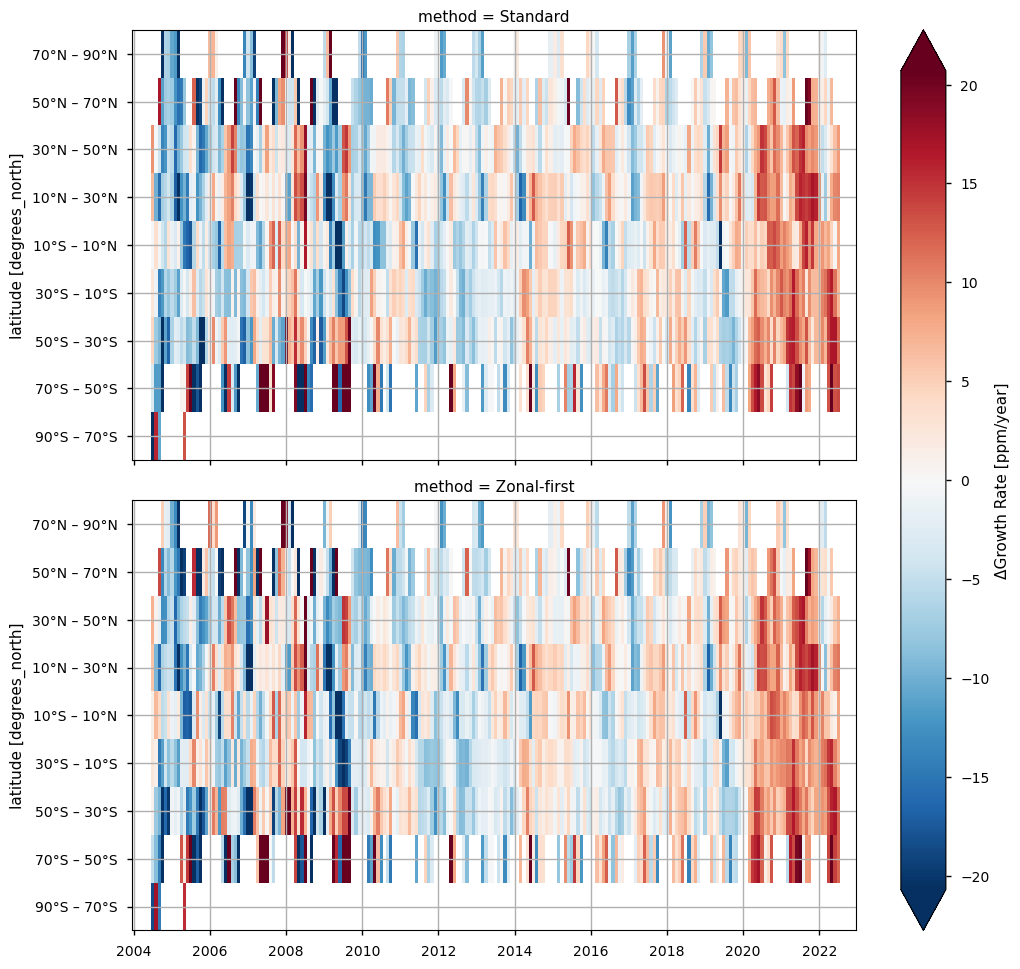

In [12]:
with xr.set_options(keep_attrs=True):
    anomaly = da - spatial_weighted_mean(da)
anomaly.attrs["long_name"] = "Δ" + anomaly.long_name
yticks = anomaly["latitude"].values.tolist()
facet = anomaly.plot(
    row="method", robust=True, x="time", figsize=(10, 10), yticks=yticks
)
for ax in facet.axs.flatten():
    ax.grid()
    ax.set_xlabel("")   # removes x-axis label
    ax.set_yticklabels([band_from_central_latitude(lat) for lat in ax.get_yticks()])

*Zonal growth rate anomalies of XCH$_4$, for the 20° latitude bands presented above, over 2004-2022. The anomalies are defined as the differences between zonal and global growth rates. The top panel is for the standard averaging, while the bottom panel is for the zonal-first averaging.*

## ℹ️ If you want to know more

### Key resources

The CDS catalogue entries for the data used were:
* Methane data from 2002 to present derived from satellite observations: https://cds.climate.copernicus.eu/datasets/satellite-methane?tab=overview

Users interested in near-real time detection of hot-spot locations for methane emissions can consider to use the CAMS Methane Hotspot Explorer: https://atmosphere.copernicus.eu/ghg-services/cams-methane-hotspot-explorer?utm_source=press&utm_medium=referral&utm_campaign=CH4-app-2025

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References
[[1]](https://library.wmo.int/idurl/4/68532) World Meteorological Organization (2023). WMO Greenhouse Gas Bulletin, No. 19, ISSN 2078-0796.

[[2]](https://doi.org/10.1073/pnas.0600201103) West, J. J., Fiore, A. M., Horowitz, L. W., and Mauzerall, D. L. (2006). Global health benefits of mitigating ozone pollution with methane emission controls, Proceedings of the National Academy of Sciences USA, 103, 3988–3993.

[[3]](https://doi.org/10.5194/essd-17-1873-2025) Saunois, M., Martinez, A., Poulter, B., Zhang, Z., Raymond, P. A., Regnier, P., Canadell, J. G., Jackson, R. B., Patra, P. K., Bousquet, P., Ciais, P., Dlugokencky, E. J., Lan, X., Allen, G. H., Bastviken, D., Beerling, D. J., Belikov, D. A., Blake, D. R., Castaldi, S., Crippa, M., Deemer, B. R., Dennison, F., Etiope, G., Gedney, N., Höglund-Isaksson, L., Holgerson, M. A., Hopcroft, P. O., Hugelius, G., Ito, A., Jain, A. K., Janardanan, R., Johnson, M. S., Kleinen, T., Krummel, P. B., Lauerwald, R., Li, T., Liu, X., McDonald, K. C., Melton, J. R., Mühle, J., Müller, J., Murguia-Flores, F., Niwa, Y., Noce, S., Pan, S., Parker, R. J., Peng, C., Ramonet, M., Riley, W. J., Rocher-Ros, G., Rosentreter, J. A., Sasakawa, M., Segers, A., Smith, S. J., Stanley, E. H., Thanwerdas, J., Tian, H., Tsuruta, A., Tubiello, F. N., Weber, T. S., van der Werf, G. R., Worthy, D. E. J., Xi, Y., Yoshida, Y., Zhang, W., Zheng, B., Zhu, Q., Zhu, Q., and Zhuang, Q. (2025). Global Methane Budget 2000–2020, Earth System Science Data, 17, 1873-1958.

[[4]](https://doi.org/10.5194/acp-24-577-2024) Hachmeister, J., Schneising, O., Buchwitz, M., Burrows, J. P., Notholt, J., and Buschmann, M. (2024). Zonal variability of methane trends derived from satellite data, Atmospheric Chemistry and Physics, 24, 577–595.

[[5]](https://doi.org/10.1038/s41558-023-01629-0) Zhang, Z., Poulter, B., Feldman, A.F., Ying, Q., Ciais, P., Peng, S., and Li, X. (2023). Recent intensification of wetland methane feedback, Nature Climate Change, 13, 430–433. 

[[6]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf) Buchwitz, M. (2024). Product User Guide and Specification (PUGS) – Main document for Greenhouse Gas (GHG: CO$_2$ & CH$_4$) data set CDR7 (01.2003-12.2022), C3S project 2021/C3S2_312a_Lot2_DLR/SC1, v7.3.

[[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_D_latest.pdf) Reuter, M., and Buchwitz, M. (2024). Algorithm Theoretical Basis Document (ATBD) – ANNEX D for products XCO2_EMMA, XCH4_EMMA, XCO2_OBS4MIPS, XCH4_OBS4MIPS (v4.5, CDR7, 2003-2022), C3S project 2021/C3S2_312a_Lot2_DLR/SC1, v7.1b.

[[8]](https://doi.org/10.24381/14j9-s541) Copernicus Climate Change Service (C3S) and World Meteorological Organization (WMO). (2025). European State of the Climate 2024.

[[9]](https://climate.copernicus.eu/global-climate-highlights-2024) Copernicus Climate Change Service (C3S). (2025). Global Climate Highlights 2024.

[[10]](https://doi.org/10.5194/acp-23-4863-2023) Feng, L., Palmer, P. I., Parker, R. J., Lunt, M. F., and Bösch, H. (2023). Methane emissions are predominantly responsible for record-breaking atmospheric methane growth rates in 2020 and 2021, Atmospheric Chemistry and Physics, 23, 4863-4880.

[[11]](https://doi.org/10.5194/acp-25-6757-2025) Niwa, Y., Tohjima, Y., Terao, Y., Saeki, T., Ito, A., Umezawa, T., Yamada, K., Sasakawa, M., Machida, T., Nakaoka, S.-I., Nara, H., Tanimoto, H., Mukai, H., Yoshida, Y., Morimoto, S., Takatsuji, S., Tsuboi, K., Sawa, Y., Matsueda, H., Ishijima, K., Fujita, R., Goto, D., Lan, X., Schuldt, K., Heliasz, M., Biermann, T., Chmura, L., Necki, J., Xueref-Remy, I., and Sferlazzo, D. (2025). Multi-observational estimation of regional and sectoral emission contributions to the persistent high growth rate of atmospheric CH$_4$ for 2020–2022, Atmospheric Chemistry and Physics, 25, 6757–6785.